As number of dimensions increase, the training data becomes more sparse. <br>
Points are further away from each other and the standard deviation in the distribution of distance decrease. <br>
k-nearest neighbor is more difficult to implement

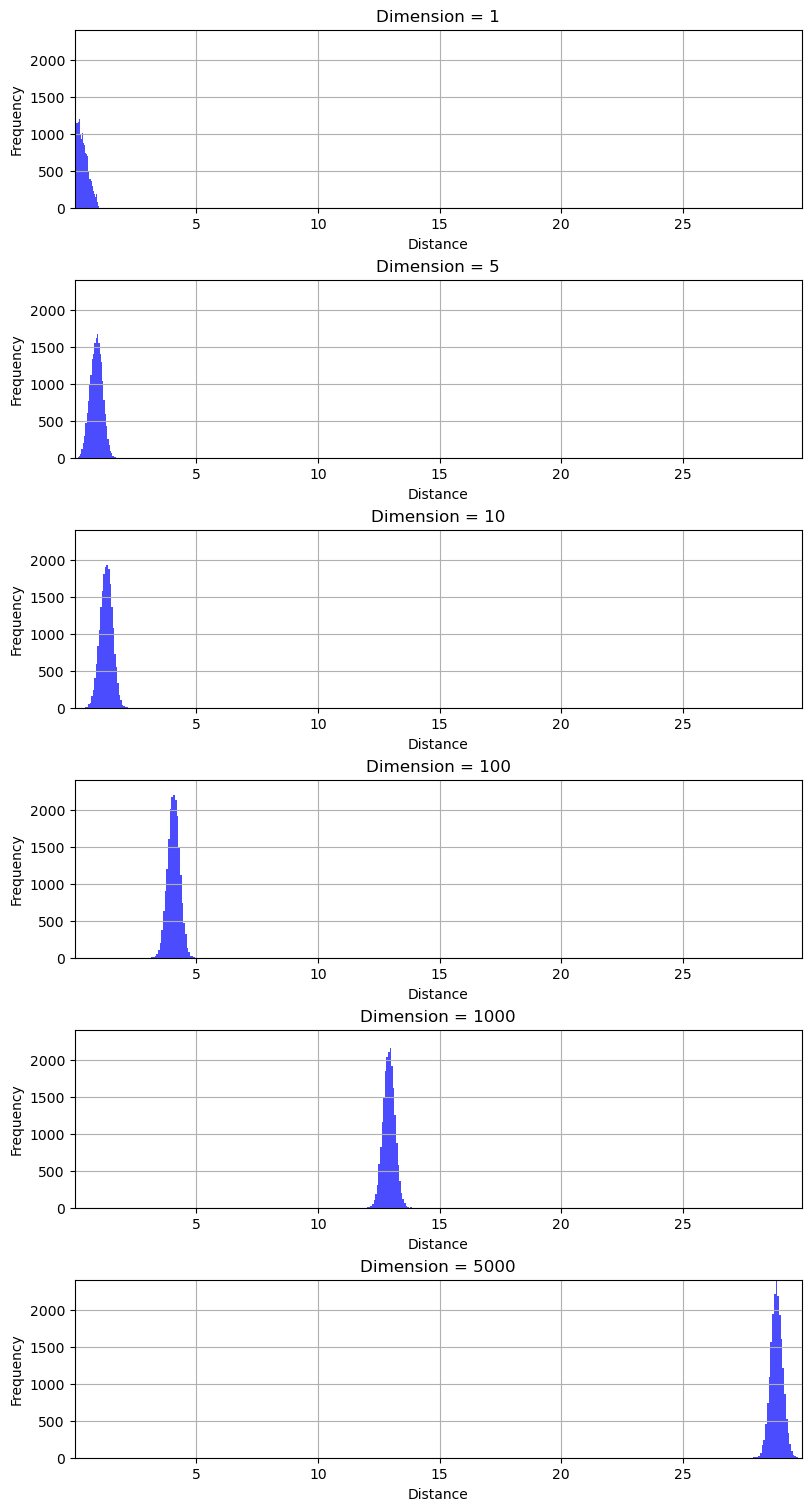

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Function to compute Minkowski distances for a given dimension
def compute_minkowski_distances(dimensions, num_points=200, p=2):
    results = []
    for d in dimensions:
        # Uniformly sample points in the d-dimensional hypercube
        points = np.random.uniform(0, 1, size=(num_points, d))
        # Compute pairwise Minkowski distances
        distances = pdist(points, metric='minkowski', p=p)
        results.append(distances)
    return results

# Define dimensions to test
dimensions = [1, 5, 10, 100, 1000,5000]
# Compute distances
distance_results = compute_minkowski_distances(dimensions)

# Determine the global y-axis limits based on frequency (not density)
global_frequency_max = max(np.histogram(dist, bins=30)[0].max() for dist in distance_results)

# Plot results in subplots with consistent x and y axes (using frequency)
fig, axes = plt.subplots(len(dimensions), 1, figsize=(8, 15), constrained_layout=True)

for i, (ax, d) in enumerate(zip(axes, dimensions)):
    ax.hist(distance_results[i], bins=30, alpha=0.7, density=False, color='blue')
    ax.set_xlim(global_min, global_max)     # Set consistent x-axis
    ax.set_ylim(0, global_frequency_max)   # Set consistent y-axis based on frequency
    ax.set_title(f'Dimension = {d}')
    ax.set_xlabel('Distance')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.show()
